In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data_jc = pd.read_excel('草原轮牧.xlsx',sheet_name = "2016-2020物种数据库")
data_G6 = data_jc[data_jc["放牧小区Block"] == "G6"]
gz_G6 = data_G6.groupby("年份").sum()
gz = gz_G6['干重(g)']


In [18]:
gz_columns = ["G6","G8","G9","G11","G12","G13","G16","G17","G18","G19","G20","G21"]
for i in ["G8","G9","G11","G12","G13","G16","G17","G18","G19","G20","G21"]:
    data_G = data_jc[data_jc["放牧小区Block"] == i]
    gz_G8 = data_G.groupby("年份").sum()
    gz = pd.concat([gz,gz_G8['干重(g)']],axis=1)
gz.columns = gz_columns

In [19]:
#gz.to_excel("放牧小区生物量.xlsx")

1.灰色关联度分析

In [22]:
# 无量纲化
def dimensionlessProcessing(df_values,df_columns):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    res = scaler.fit_transform(df_values)
    return pd.DataFrame(res,columns=df_columns)

# 求第一列(影响因素)和其它所有列(影响因素)的灰色关联值
def GRA_ONE(data,m=0): # m为参考列
    # 标准化
    data = dimensionlessProcessing(data.values,data.columns)
    # 参考数列
    std = data.iloc[:,m]
    # 比较数列
    ce = data.copy()
    
    n = ce.shape[0]
    m = ce.shape[1]
    
    # 与参考数列比较，相减
    grap = np.zeros([n,m])
    for i in range(m):
        for j in range(n):
            grap[j,i] = abs(ce.iloc[j,i] - std[j])
            
    # 取出矩阵中的最大值和最小值
    mmax = np.amax(grap)
    mmin = np.amin(grap)
    ρ = 0.5 # 灰色分辨系数
    
    # 计算值
    grap = pd.DataFrame(grap).applymap(lambda x:(mmin+ρ*mmax)/(x+ρ*mmax))
    
    # 求均值，得到灰色关联值
    RT = grap.mean(axis=0)
    return pd.Series(RT)

# 调用GRA_ONE，求得所有因素之间的灰色关联值
def GRA(data):
    list_columns = np.arange(data.shape[1])
    df_local = pd.DataFrame(columns=list_columns)
    for i in np.arange(data.shape[1]):
        df_local.iloc[:,i] = GRA_ONE(data,m=i)
    df_local.columns = data.columns
    df_local.index = data.columns    
    return df_local

In [25]:
fm4 = pd.read_excel("放牧小区生物量.xlsx",sheet_name = "Sheet2")

<AxesSubplot:>

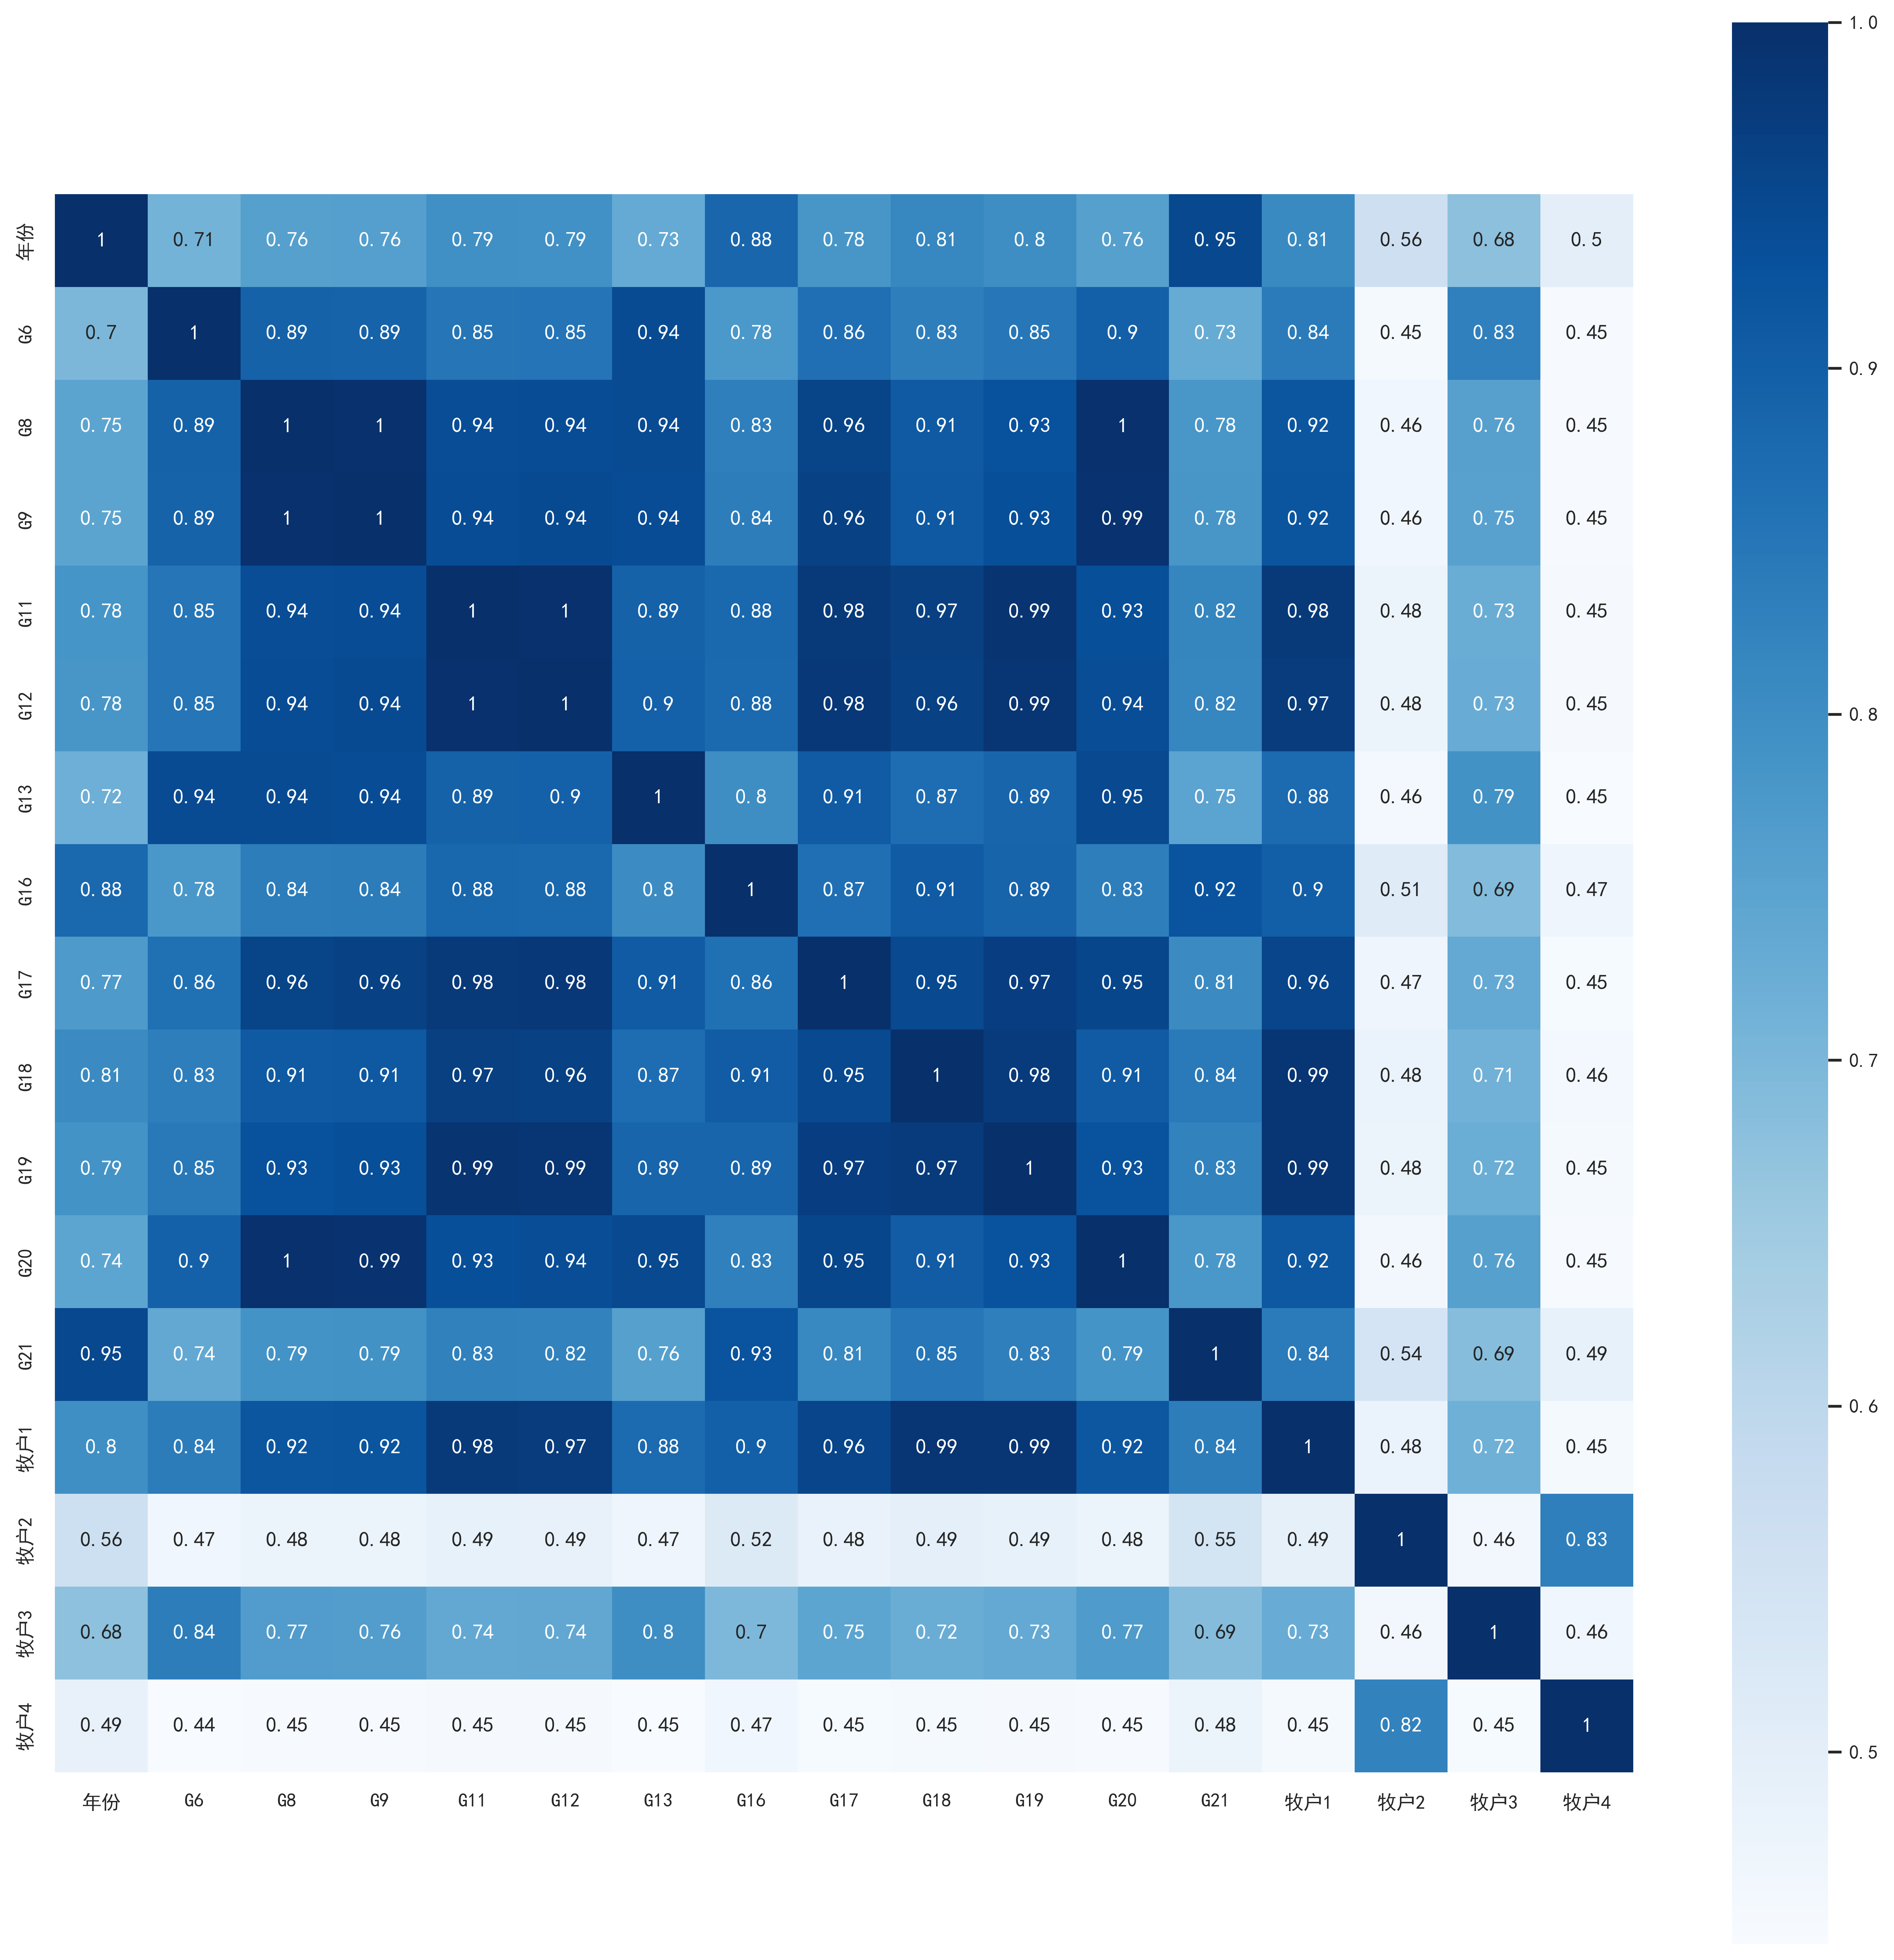

In [35]:
fm4_gld = GRA(fm4)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
plt.subplots(figsize=(16,16),dpi=490,facecolor='w')# 设置画布大小，分辨率，和底色
sns.heatmap(fm4_gld ,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')